# Stats Review

### Z-Score and outlier removal


To find outliers in the data, we will first create a new column called `Z_SCORE`. A z-score is useful because it tells you where a value lies in a distribution. 

Data professionals often use z-scores for outlier detection. Typically, they consider observations with a z-score smaller than -3 or larger than +3 as outliers. In other words, these are values that lie more than +/- 3 SDs from the mean.  

Then, we will compute the z-scores using the function `scipy.stats.zscore()`. 

**Reference**: [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('data/education_districtwise.csv')
df = df.dropna()

In [3]:
df.describe()

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,634.000000,634.000000,634.000000,6.340000e+02,634.000000
mean,11.118297,899.619874,124.610410,1.899024e+06,73.395189
std,9.799581,632.473675,95.821688,1.547475e+06,10.098460
min,1.000000,6.000000,1.000000,7.948000e+03,37.220000
25%,6.000000,396.750000,60.000000,8.226940e+05,66.437500
50%,8.000000,816.500000,105.000000,1.564392e+06,73.490000
75%,13.000000,1231.500000,167.000000,2.587520e+06,80.815000
max,66.000000,3963.000000,592.000000,1.105413e+07,98.760000


In [4]:
df.shape

(634, 7)

In [5]:
# sampling
sample_df = df.sample(50, replace=True)
sample_df.describe()

,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
count,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,11.160000,962.840000,117.280000,1.767898e+06,71.478800
std,12.004013,652.470575,100.050812,1.438647e+06,10.869588
min,1.000000,6.000000,1.000000,4.193400e+04,42.670000
25%,6.000000,500.500000,54.250000,9.685858e+05,64.772500
50%,8.000000,979.500000,91.500000,1.428282e+06,71.835000
75%,11.000000,1370.500000,150.500000,1.845088e+06,78.125000
max,66.000000,3142.000000,568.000000,7.102430e+06,98.350000


In [6]:
df['li_z_score'] = stats.zscore(df['OVERALL_LI'])
df['li_z_score'].describe()

count    6.340000e+02
mean    -8.293401e-16
std      1.000790e+00
min     -3.585076e+00
25%     -6.895292e-01
50%      9.396045e-03
75%      7.353269e-01
max      2.513733e+00
Name: li_z_score, dtype: float64

<Axes: >

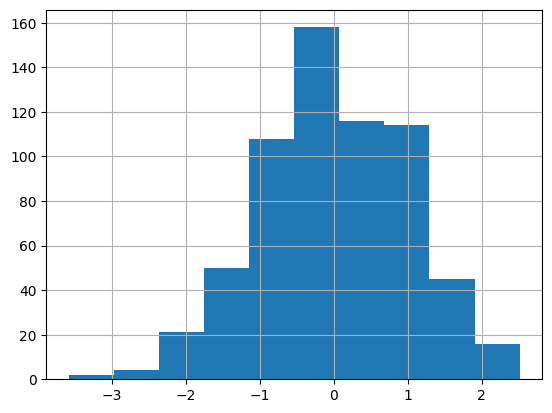

In [7]:
df['li_z_score'].hist()

## Confidence Intervals

We use the below function from stats.norm

### scipy.stats.norm.interval(alpha=confidence level (95),  loc=data.mean(), scale=sample_standard_error)

**Sample Standard Error** = sample.sd / sqrt(n)  or sqrt(p(1-p)/n)



In [18]:
stats.norm.interval(.95, sample_df['OVERALL_LI'].mean(), sample_df['OVERALL_LI'].std()/np.sqrt(sample_df['OVERALL_LI'].shape[0]))

# or

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*
pop_stdev = sample_df['OVERALL_LI'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/np.sqrt(sample_df['OVERALL_LI'].shape[0]))
sample_mean = sample_df['OVERALL_LI'].mean()
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error) 

(68.4659594126738, 74.49164058732616)

In [ ]:


t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)


In [71]:
sample_df_small = sample_df.sample(n=10)

In [78]:

stats.t.interval(confidence=.95, 
                 df=sample_df_small['OVERALL_LI'].shape[0]-1, 
                 loc = sample_df_small['OVERALL_LI'].mean(),
                 scale = sample_df_small['OVERALL_LI'].std()/np.sqrt(sample_df_small['OVERALL_LI'].shape[0]))


(59.191823172312915, 79.99417682768708)

In [79]:
sample_size = sample_df_small['OVERALL_LI'].shape[0]
sample_mean = sample_df_small['OVERALL_LI'].mean()
t_critical = stats.t.ppf(q = 0.95, df=sample_size-1)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_std = sample_df_small['OVERALL_LI'].std()    # Get the sample standard deviation

sigma = sample_std/np.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)


t-critical value:
1.8331129326536335
Confidence interval:
(61.16452647407216, 78.02147352592785)


In [20]:
sample_df_small['OVERALL_LI'].mean()

72.552

In [13]:
stats.norm.interval(.1, sample_df['OVERALL_LI'].mean(), sample_df['OVERALL_LI'].std()/np.sqrt(sample_df['OVERALL_LI'].shape[0]))

(74.52403310971094, 74.91596689028906)

# Hypothesis testing

### 1. One-Sample ttest

**stats.ttest_1samp(rvs, popmean=0.5, alternative='greater')** # alternative = {‘two-sided’, ‘less’, ‘greater’}

In [49]:
# Null Hypothesis: no change; alternative: sample has a greater overal_li than pop

stats.ttest_1samp(sample_df['OVERALL_LI'], popmean=73.395189, alternative='greater')

TtestResult(statistic=0.8495186831962375, pvalue=0.19986219622430862, df=49)

### 2. Two-Sample ttest

**scipy.stats.ttest_ind(a=observations 1st sample, b=obervations 2nd sample, equal_var=False)**

In [15]:
stats.ttest_ind(df['OVERALL_LI'].sample(50), df['OVERALL_LI'].sample(33), equal_var=False)

Ttest_indResult(statistic=1.642945789407739, pvalue=0.10455299103052379)

### 3. One-Sample ztest (Proportions)

1. Calculate the sample proportion
p_hat = x/n

2. Calculate the test statistic
test_stat = (p_hat-p)/(math.sqrt((p*(1-p))/(n)))

3. Output the p-value of the test statistic
*  right tailed test: print(**1-stats.norm.cdf(test_stat)**)
* left tailed test: print(**stats.norm.cdf(test_stat)**)
* Two-tailed test: print(**2*stats.norm.cdf(test_stat)**)

proportion of converted in pop = 0.0967741935483871
proportion of converted in sample = 0.16


<Axes: >

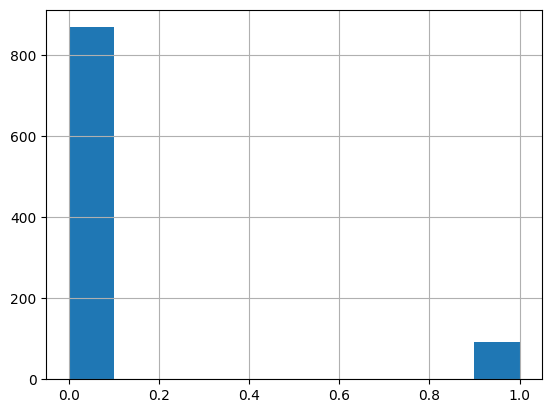

In [26]:
#loading and preparing the data
ab_data = pd.read_csv('data/ab_data.csv')
p_data = ab_data[ab_data['group']=='A']
print(f"proportion of converted in pop = {p_data[p_data['converted']==1].shape[0]/p_data.shape[0]}")

p_data_sample = p_data.sample(50) # sampling
print(f"proportion of converted in sample = {p_data_sample[p_data_sample['converted']==1].shape[0]/p_data_sample.shape[0]}")
p_data['converted'].hist()

In [39]:
# Null Hypothese: proportion hasn't changed
# H1: The prportion has increaded
n=50
p = p_data[p_data['converted']==1].shape[0]/p_data.shape[0]
p_hat = p_data_sample[p_data_sample['converted']==1].shape[0]/p_data_sample.shape[0]
test_stat = (p_hat-p)/(np.sqrt((p*(1-p))/(n)))

print(f"p-value: {1-stats.norm.cdf(test_stat):.4f}")


p-value: 0.0652


### 4. Two-Sample ztest (Proportions)

In [42]:
# prepare the data
ab_data = pd.read_csv('data/ab_data.csv')
x_A = ab_data.loc[(ab_data['group']=='A')&(ab_data['converted']==1)].shape[0]
n_A = ab_data.loc[(ab_data['group']=='A')].shape[0]

x_B = ab_data.loc[(ab_data['group']=='B')&(ab_data['converted']==1)].shape[0]
n_B = ab_data.loc[(ab_data['group']=='B')].shape[0]

x_B=101
x_A, n_A, x_B, n_B

(93, 961, 101, 1039)

In [51]:
p_hat_A = x_A/n_A
p_hat_B = x_B/n_B

pooled_p = (x_A+x_B)/(n_A+n_B)

pooled_std_error = np.sqrt( pooled_p*(1-pooled_p)*((1/n_A)+(1/n_B)) )

z_val = (p_hat_A-p_hat_B)/pooled_std_error

print(f"p-value: (greater) {1-stats.norm.cdf(z_val):.4f}")

print(f"p-value: (two-sided) {2*(stats.norm.cdf(z_val)):.4f}")

p-value: (greater) 0.5131
p-value: (two-sided) 0.9738


6.423783727171894e-11

In [47]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest([x_A, x_B],[n_A, n_B], alternative='two-sided')

(-0.032815235231003916, 0.9738219287985949)